Для датасету

https://archive.ics.uci.edu/ml/datasets/wine+quality

побудувати модель лінійної регресії

Обов'язкові кроки:

первинний аналіз даних (відстуність пропусків, наявність категоріальних фіч, ...)
фича інжиніринг (побудувати 1-2 нові фічі)
масштабування фіч
поділ датасету на тренувальну, валідаційну та тестову частини
тренування базової моделі із дефолтними гіперпараметрами
підбір гіперпараметрів
оцінка результатів

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import make_pipeline

In [83]:
white = pd.read_csv("winequality-white.csv", sep= ';')
red = pd.read_csv("winequality-red.csv",  sep= ';')

In [84]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [85]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [86]:
red['density'].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

In [87]:
white['density'].describe()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

видим что плотность слабо меняется в пределах тех значений, заменим значения, чтобі лучше біло видно изменения

In [88]:
red['density'] = (red['density'] - 0.98) * 100

In [89]:
white['density'] = (white['density'] - 0.98) * 100

In [90]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [91]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


никаких пропусков в таблице нет

<AxesSubplot: >

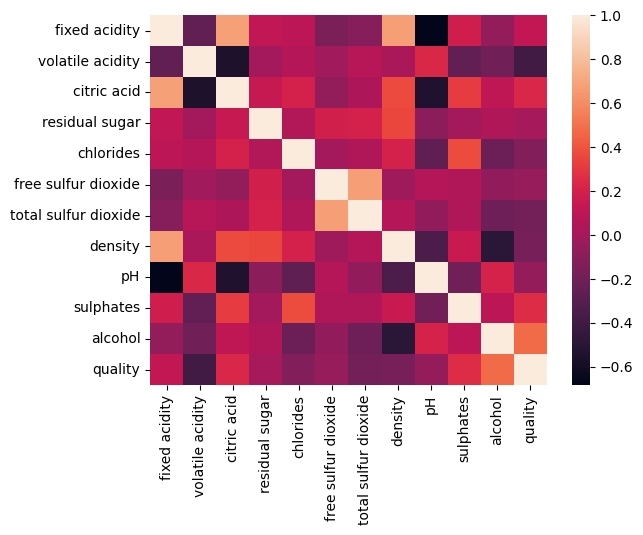

In [92]:
sns.heatmap(red.corr())

<AxesSubplot: >

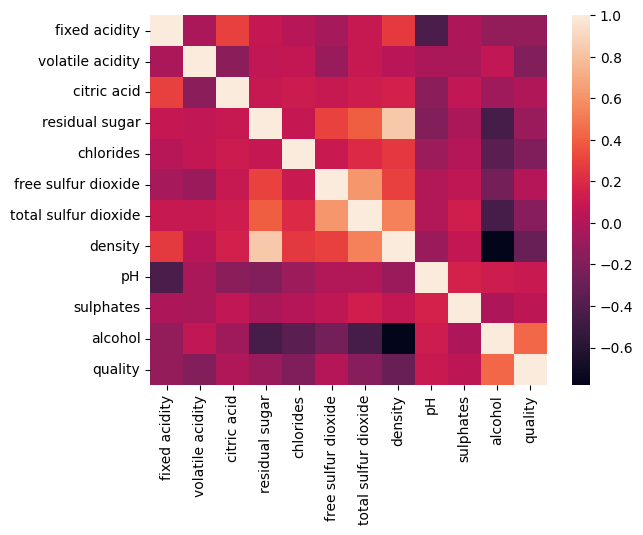

In [93]:
sns.heatmap(white.corr())

сильных корреляций нет(за исключением количества сахара и плоности в белом вине, но избавляться от какой либо из этих фич не хотелось бы). поэтому все фичи оставляем и думаем какие бы добавить свои

Содержание свободного диоксида серы состоит из трех частей: молекула SO2 , бисульфит (HSO3)SO2 , и сульфит (SO32-). Поскольку количество сульфитов весьма незначительно (менее 1 процента), процентное содержание свободного SO2 в сульфитной форме не часто рассчитывается. Большая часть (более 90 процентов) свободного SO2 состоит из бисульфитной формы, которая действует как антиоксидант в вине. Однако небольшая часть SO2 также будет существовать в виде молекулярной формы. Молекула SO2 является противомикробным агентом, который вносит вклад в концентрацию свободного диоксида серы. Молекулярный SO2 можно рассчитать с помощью следующего уравнения:
[молекулярный SO2] = [Свободный SO2 ] / [1 + 10^(pH-1,8)]

добавим Это значение в качестве фичи

In [94]:
white['molecular sulfur dioxide'] = white['free sulfur dioxide'] / (1+10**(white['pH'] - 1.8))

In [95]:
red['molecular sulfur dioxide'] = red['free sulfur dioxide'] / (1+10**(red['pH'] - 1.8))

Соотношение между рН и SO2

Свободный SO2 что защищает вино от окисления и микроорганизмов, которые могут испортить вино. Более конкретно, молекулярная SO2 является активным компонентом свободного SO2, и его эффективность зависит от рН вина.

Как правило, вы должны быть нацелены на уровень свободного SO2 приблизительно [(рН-3,0) х100] мг / л для красных вин; для белых вин добавить 10 к этому значению. Этот расчет предполагает, что ваше вино имеет рН выше 3,0.


добавим модуль отношения сфободного SO2 и [(рН-3,0) х100] в качестве еще одной фичи

In [96]:
white['koeff'] =  (abs(white['pH']-3)*100) / white['free sulfur dioxide'] 

In [97]:
red['koeff'] =  (abs(red['pH']-3)*100 + 10) / red['free sulfur dioxide'] 

<AxesSubplot: >

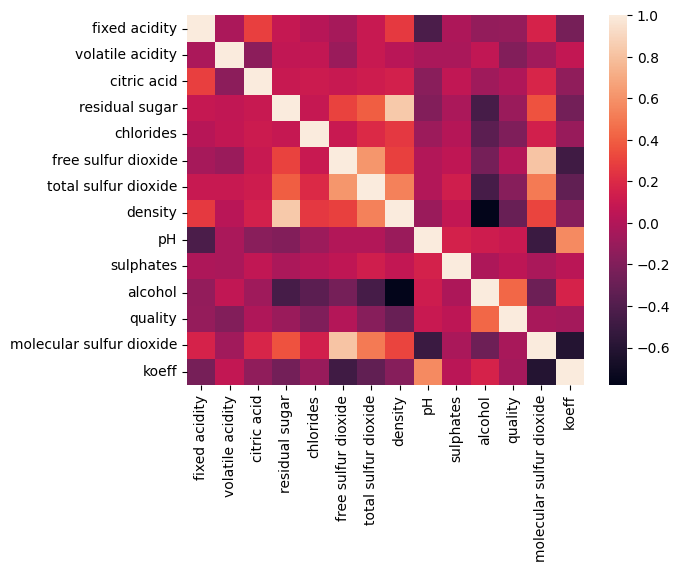

In [98]:
sns.heatmap(white.corr())

<AxesSubplot: >

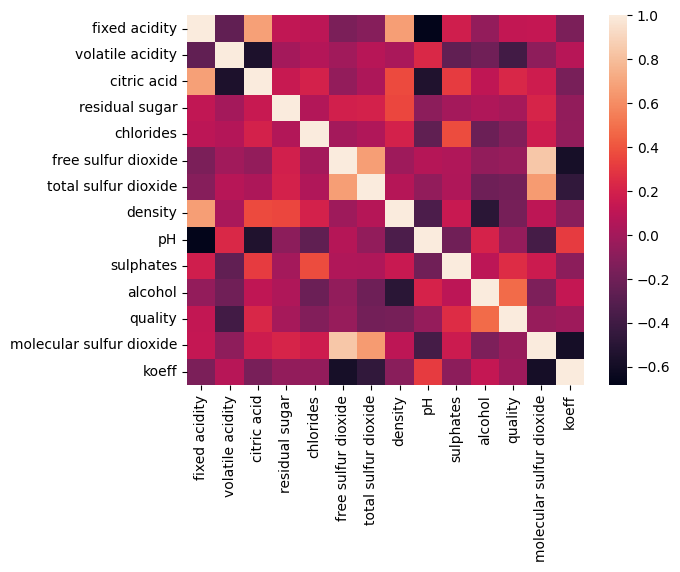

In [99]:
sns.heatmap(red.corr())

никакие фичи сильно не кореллюют поэтому оставляем как есть

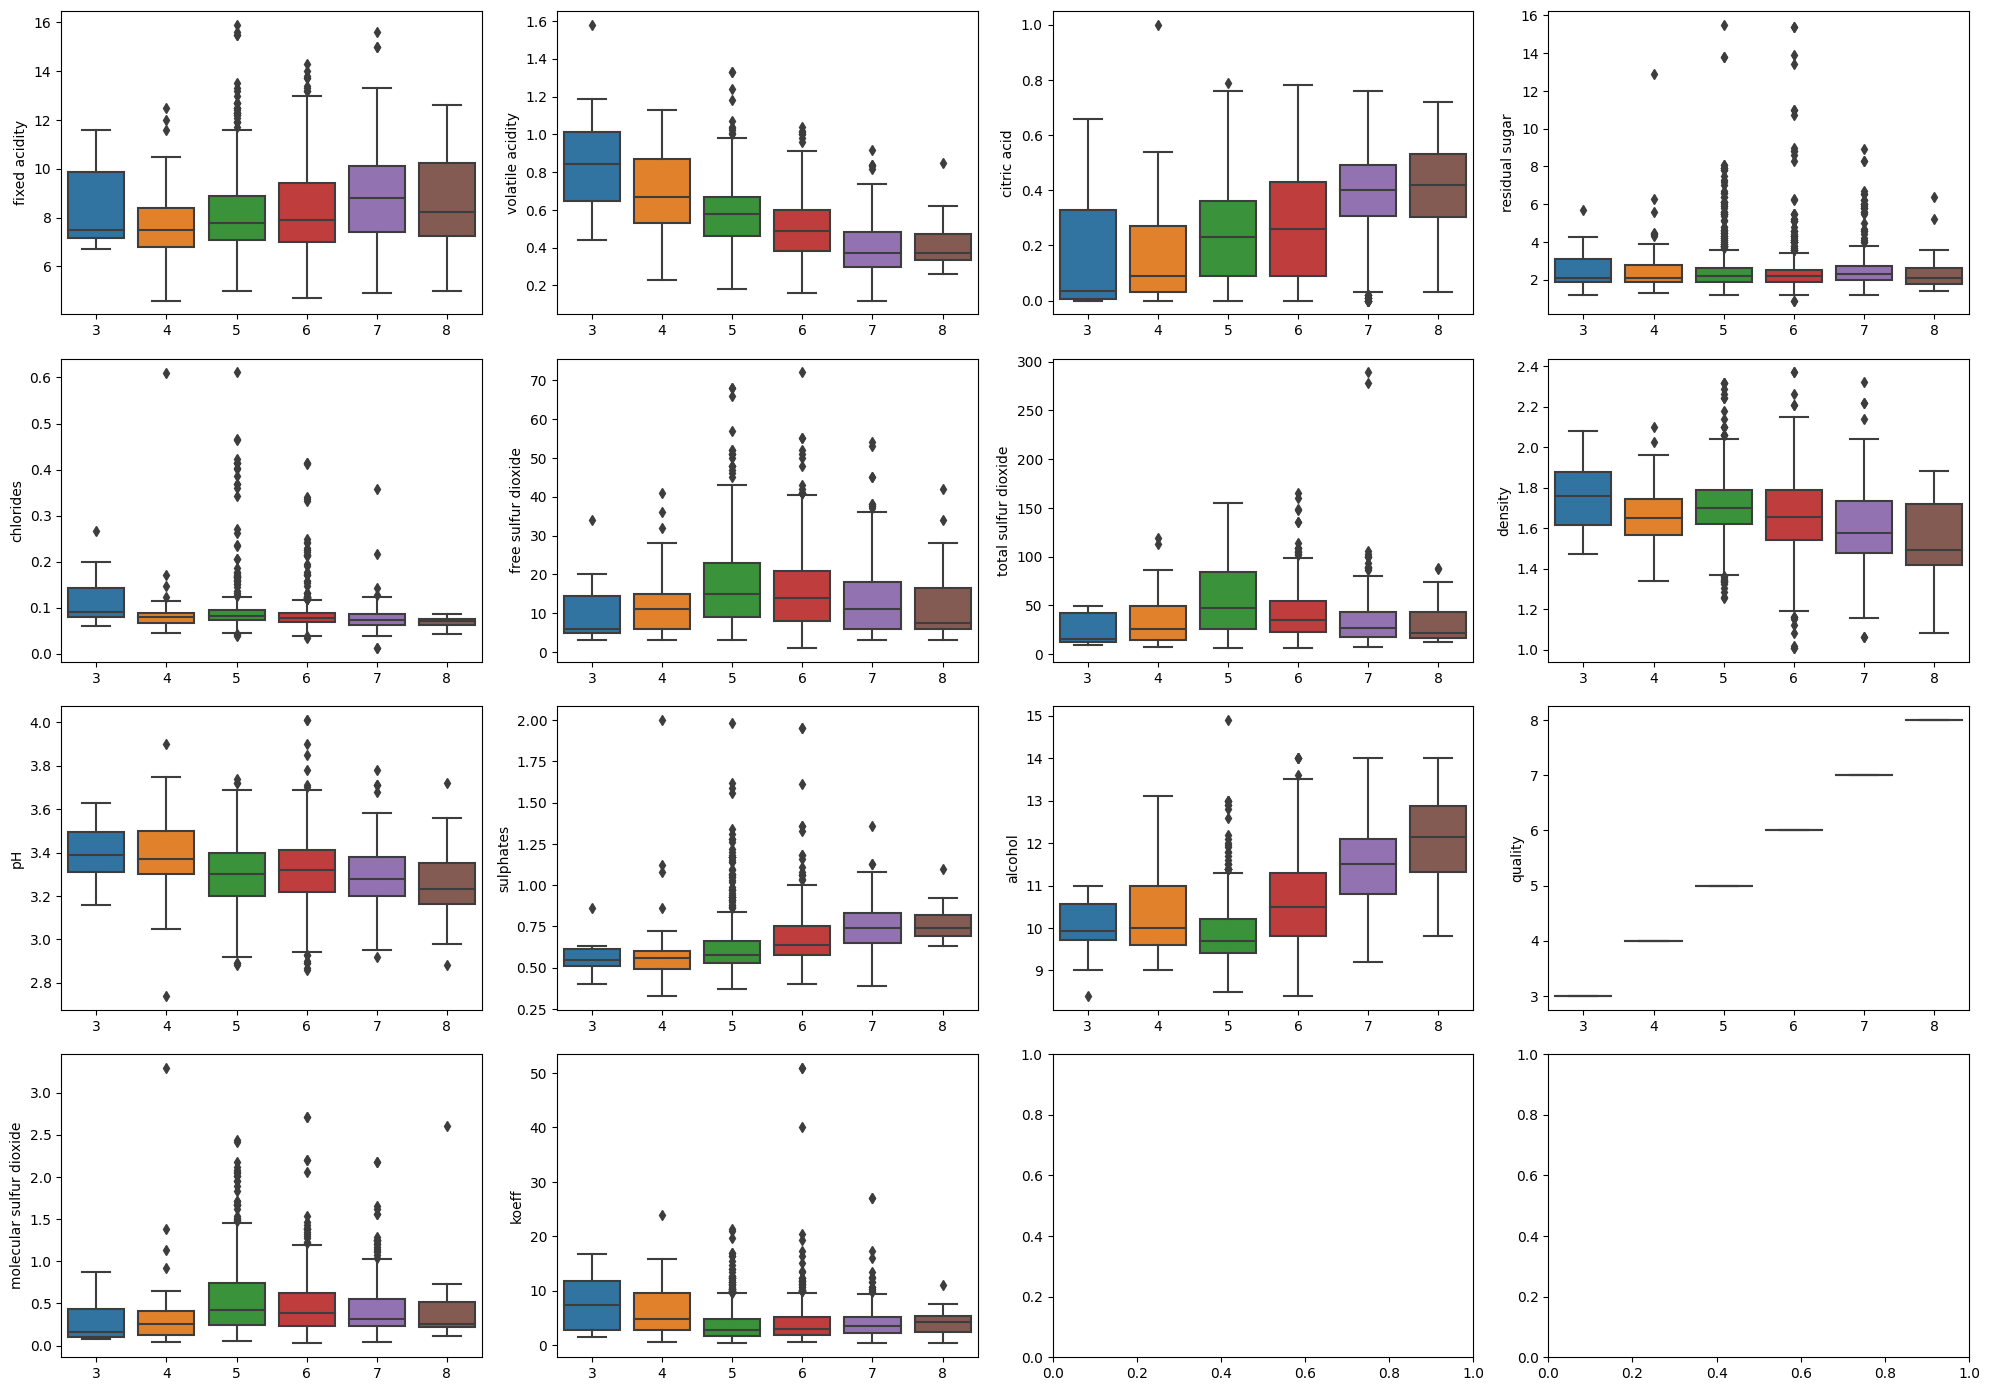

In [100]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 14))
for idx, feat in enumerate(red):
    ax = axes[int(idx/4), idx % 4]
    sns.boxplot(red, x="quality", y=feat, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()


из графиков красного вина видно, что на оценку положительно влияет уменьшение летучей кислотности(т.к. эта кислотность очень сильно влияет на запах) и увеличение количества алкоголя(хоть и влияет меньше судя по графикам)

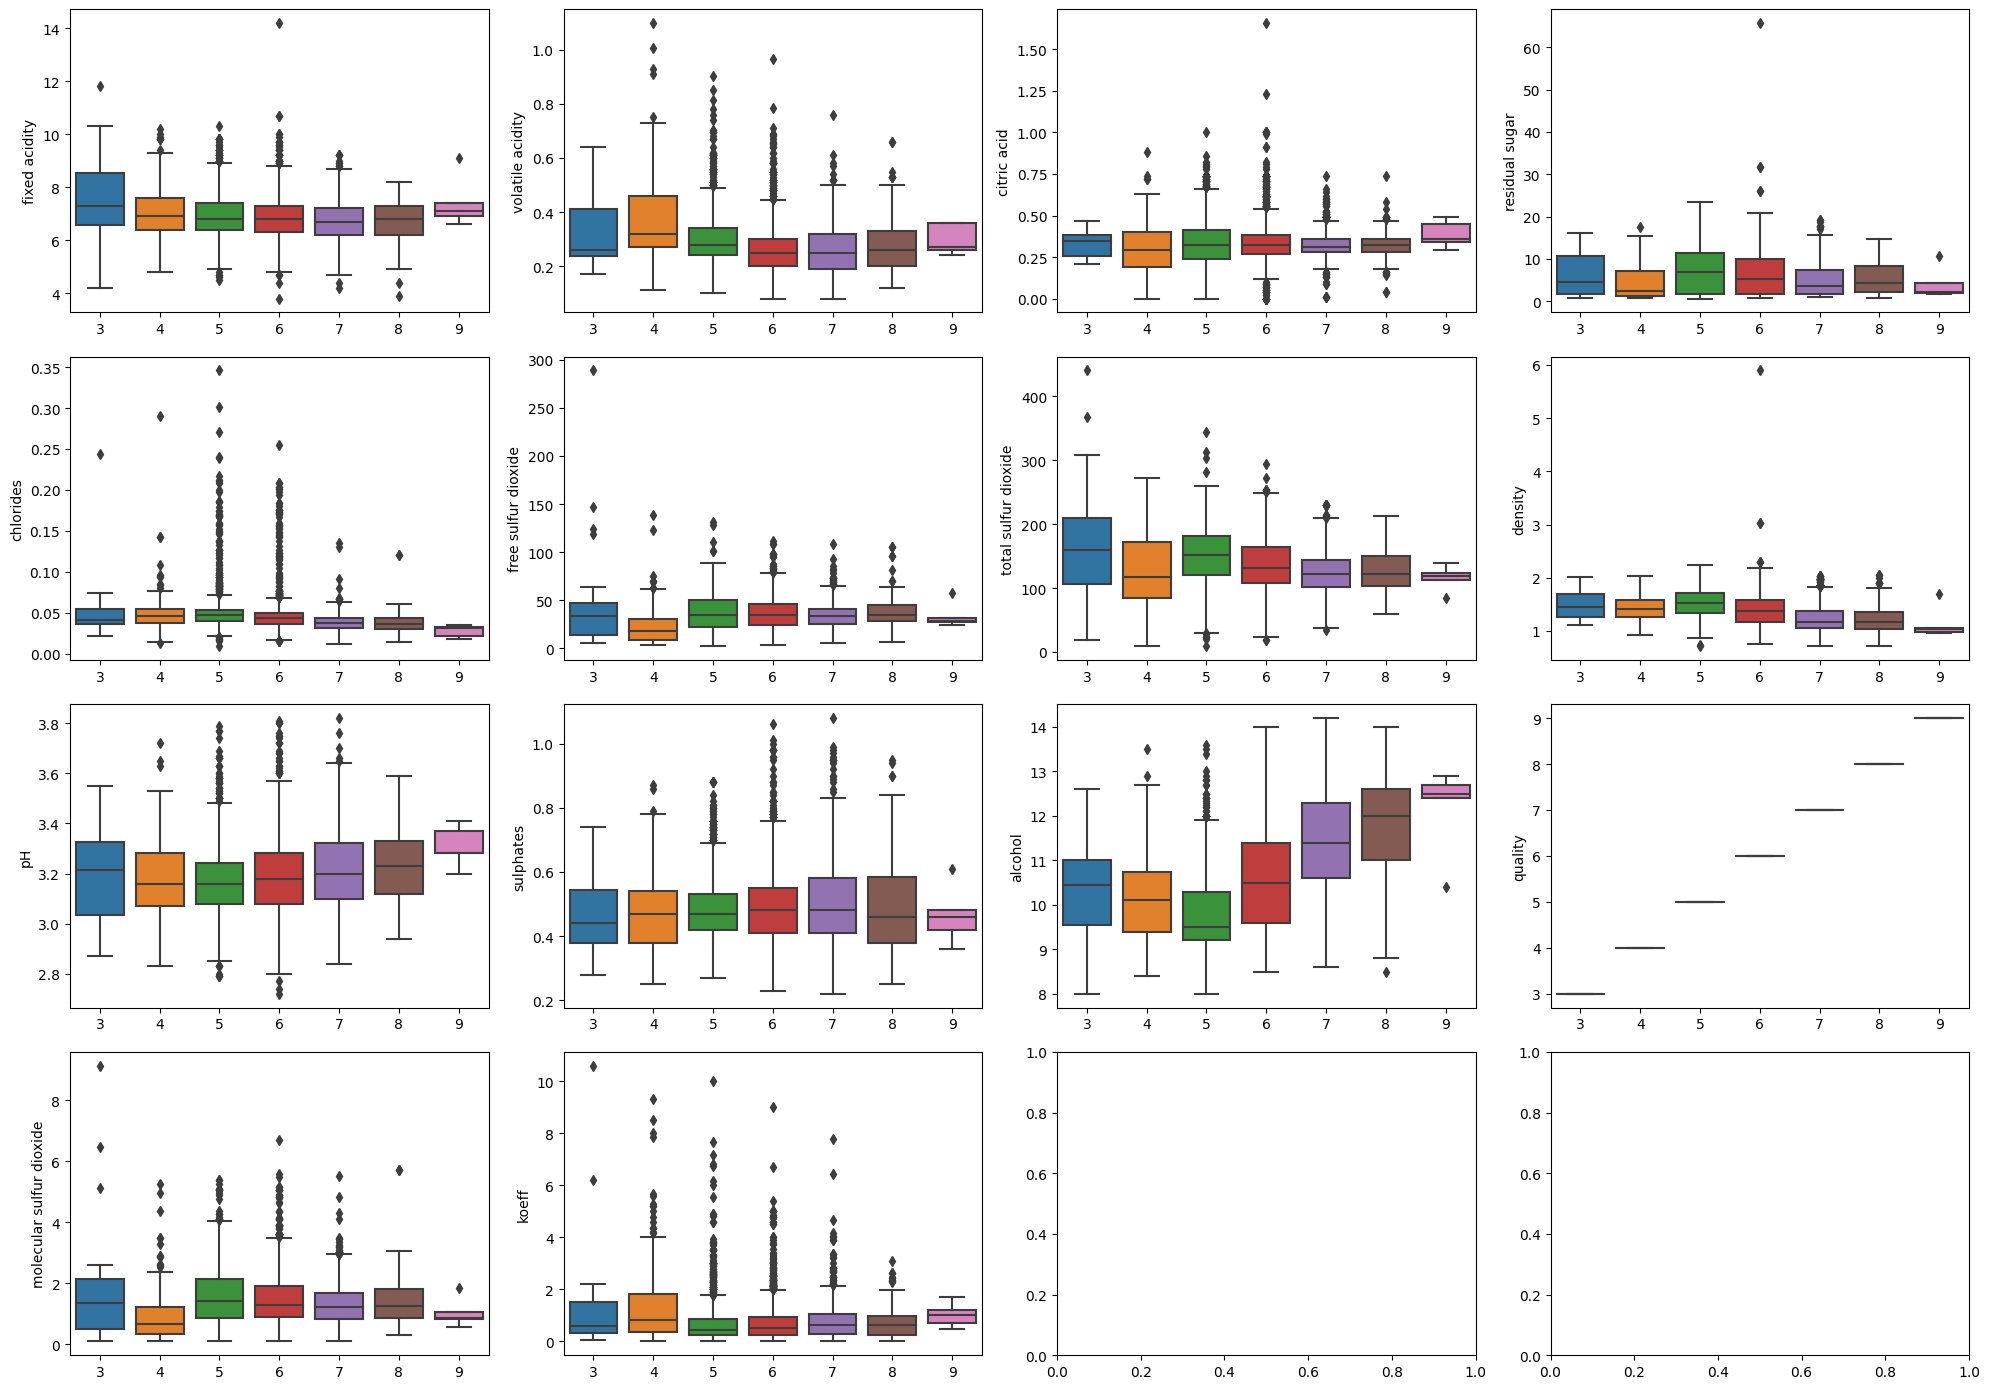

In [101]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 14))
for idx, feat in enumerate(white):
    ax = axes[int(idx/4), idx % 4]
    sns.boxplot(white, x="quality", y=feat, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()

по графикам из белого вина ничего сказать нельзя. можно предположить что увеличение количества алкоголя так же положительно влияют на оценку, с поправкой что для плохих вин(с оценкой 3 и 4) это никак не исправляет ситуациюю

сначала создадим модель для белого вина. модели будут разные, т.к. не смотря на одинаковые параметры, данные этих параметров заметно отличаютсяю

In [102]:
y = np.array(white['quality'])
X = white.drop(columns = 'quality')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
X_train.shape, y_train.shape

((3918, 13), (3918,))

In [105]:
X_test.shape, y_test.shape

((980, 13), (980,))

In [106]:
param_grid = {'sgdregressor__penalty': ['l2', 'l1', 'elasticnet', None],'sgdregressor__max_iter': [500, 1000, 2000], 
              'sgdregressor__learning_rate': ['constant', 'optima', 'invscaling', 'adaptive'],
               'sgdregressor__learning_rate':['constant', 'optimal', 'invscaling', 'adaptive']}

In [107]:
reg = make_pipeline(StandardScaler(),SGDRegressor())

In [108]:
reg_2 = make_pipeline(StandardScaler(),LinearRegression())

In [109]:
clf = GridSearchCV(reg, param_grid)

In [110]:
for param in clf.get_params().keys():
    print(param)

cv
error_score
estimator__memory
estimator__steps
estimator__verbose
estimator__standardscaler
estimator__sgdregressor
estimator__standardscaler__copy
estimator__standardscaler__with_mean
estimator__standardscaler__with_std
estimator__sgdregressor__alpha
estimator__sgdregressor__average
estimator__sgdregressor__early_stopping
estimator__sgdregressor__epsilon
estimator__sgdregressor__eta0
estimator__sgdregressor__fit_intercept
estimator__sgdregressor__l1_ratio
estimator__sgdregressor__learning_rate
estimator__sgdregressor__loss
estimator__sgdregressor__max_iter
estimator__sgdregressor__n_iter_no_change
estimator__sgdregressor__penalty
estimator__sgdregressor__power_t
estimator__sgdregressor__random_state
estimator__sgdregressor__shuffle
estimator__sgdregressor__tol
estimator__sgdregressor__validation_fraction
estimator__sgdregressor__verbose
estimator__sgdregressor__warm_start
estimator
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose


In [111]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__learning_rate': ['constant', 'optimal',
                                                         'invscaling',
                                                         'adaptive'],
                         'sgdregressor__max_iter': [500, 1000, 2000],
                         'sgdregressor__penalty': ['l2', 'l1', 'elasticnet',
                                                   None]})

In [112]:
clf.score(X_test, y_test)

0.28160316722654255

In [113]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [114]:
reg.score(X_test, y_test)

0.2922573797535626

In [115]:
reg_2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [116]:
reg_2.score(X_test, y_test)

0.2812361716179481

In [117]:
y = np.array(red['quality'])
X = red.drop(columns = 'quality')

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [120]:
reg.score(X_test, y_test)

0.3187650257806325

In [121]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__learning_rate': ['constant', 'optimal',
                                                         'invscaling',
                                                         'adaptive'],
                         'sgdregressor__max_iter': [500, 1000, 2000],
                         'sgdregressor__penalty': ['l2', 'l1', 'elasticnet',
                                                   None]})

In [122]:
clf.score(X_test, y_test)

0.31392345816300915

In [123]:
clf.set_params()

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__learning_rate': ['constant', 'optimal',
                                                         'invscaling',
                                                         'adaptive'],
                         'sgdregressor__max_iter': [500, 1000, 2000],
                         'sgdregressor__penalty': ['l2', 'l1', 'elasticnet',
                                                   None]})

In [124]:
clf.score(X_test, y_test)

0.31392345816300915

In [125]:
reg_2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [126]:
reg_2.score(X_test, y_test)

0.3230710289194567

по итогу результаты получились примерно одинковые с испльзованием GridSearchCV и без него, что говорит о том, что стандартные параметры в данном случае являются оптимальными.скор в пределах 0,3 приемлемый. у всех видов регрессии результаты получились примерно одинаковые.